In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Domain of the dataset**

The mushroom classification dataset lies under the domain of food safety and agriculture. It tells us weather the mushroom is edible or not. Where 0 refers to edible and 1 refers to poisonous.


In [ ]:
import numpy as np
import pandas as pd

# Loading the dataset
df = pd.read_csv("/content/mushroom_cleaned.csv")
df.head()

In [ ]:
# To determine the number of columns and rows
df.shape

(54035, 9)

In [ ]:
# To determine the statistical summary of the data in the dataset
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
# To determine the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
# To determine the Null values in each column
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


**Feature Engineering**

*   min-max Scaler

In [ ]:
# Apply min-max scaler on the required columns
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-width', 'stem-color']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,3.807467,0.432894,0.916667,1.804273,1
1,0.772607,0.333333,0.333333,0.909091,3.807467,0.436257,0.916667,1.804273,1
2,0.725013,0.333333,0.333333,0.909091,3.612496,0.438778,0.916667,1.804273,1
3,0.666843,1.000000,0.333333,0.909091,3.787572,0.438778,0.916667,1.804273,1
4,0.690111,1.000000,0.333333,0.909091,3.711971,0.410199,0.916667,0.943195,1



*   Removing duplicate rows

In [ ]:
# To drop any duplicate rows in the dataset
df.drop_duplicates(inplace=True)

df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,3.807467,0.432894,0.916667,1.804273,1
1,0.772607,0.333333,0.333333,0.909091,3.807467,0.436257,0.916667,1.804273,1
2,0.725013,0.333333,0.333333,0.909091,3.612496,0.438778,0.916667,1.804273,1
3,0.666843,1.000000,0.333333,0.909091,3.787572,0.438778,0.916667,1.804273,1
4,0.690111,1.000000,0.333333,0.909091,3.711971,0.410199,0.916667,0.943195,1


In [ ]:
# To check the number of rows after deleting the duplicate rows
df.shape

(53732, 9)

**Exploratory Data Analysis (EDA)**

*   Histogram of each column

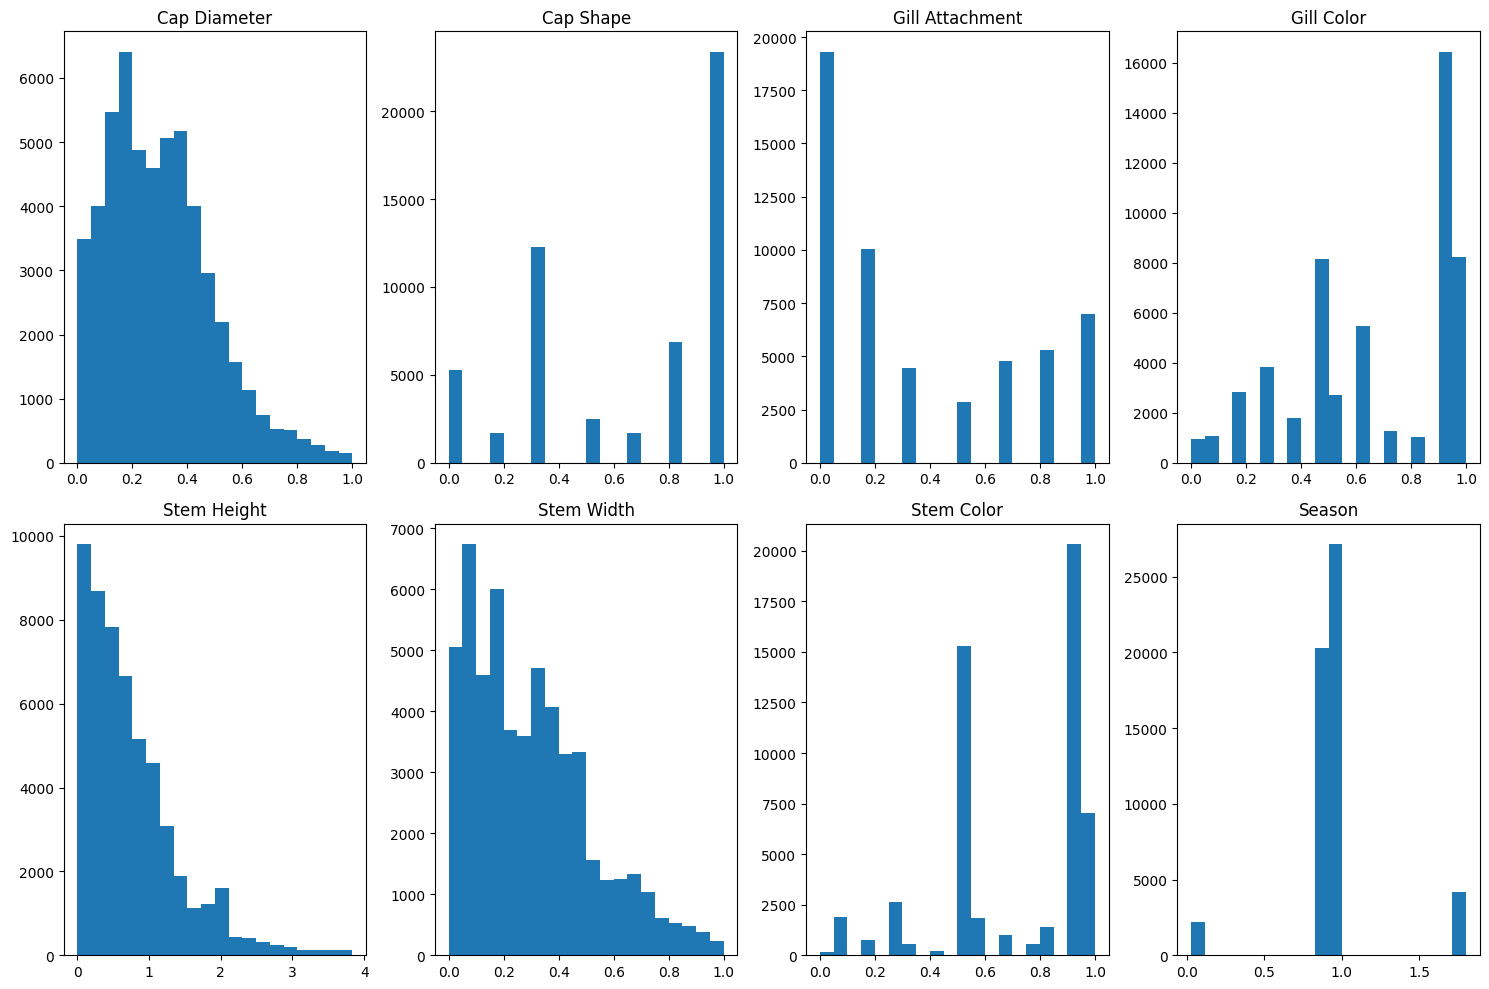

In [ ]:
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.hist(df['cap-diameter'], bins=20)
plt.title('Cap Diameter')

plt.subplot(2, 4, 2)
plt.hist(df['cap-shape'], bins=20)
plt.title('Cap Shape')

plt.subplot(2, 4, 3)
plt.hist(df['gill-attachment'], bins=20)
plt.title('Gill Attachment')

plt.subplot(2, 4, 4)
plt.hist(df['gill-color'], bins=20)
plt.title('Gill Color')

plt.subplot(2, 4, 5)
plt.hist(df['stem-height'], bins=20)
plt.title('Stem Height')

plt.subplot(2, 4, 6)
plt.hist(df['stem-width'], bins=20)
plt.title('Stem Width')

plt.subplot(2, 4, 7)
plt.hist(df['stem-color'], bins=20)
plt.title('Stem Color')

plt.subplot(2, 4, 8)
plt.hist(df['season'], bins=20)
plt.title('Season')

plt.tight_layout()
plt.show()


*   Analysing class imbalance

class
1    29372
0    24360
Name: count, dtype: int64


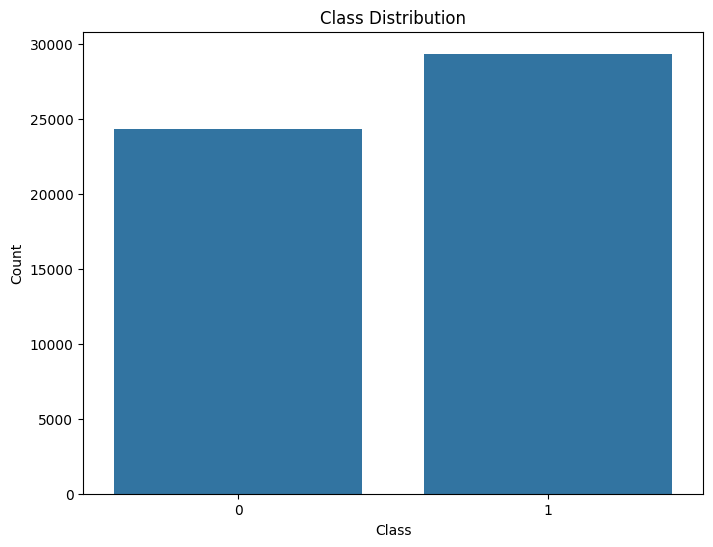

class
1    54.663887
0    45.336113
Name: count, dtype: float64
Class imbalance not significant enough to use resampling techniques.


In [ ]:
# Class Imbalance Analysis
class_counts = df['class'].value_counts()
print(class_counts)

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
class_percentages = (class_counts / len(df)) * 100
print(class_percentages)

# To determine if class balancing is needed
if class_percentages.min() < 20:
    print("Class imbalance detected. Consider resampling techniques.")
else:
    print("Class imbalance not significant enough to use resampling techniques.")


*   Correlation Heatmap to identify relationships between
each feature

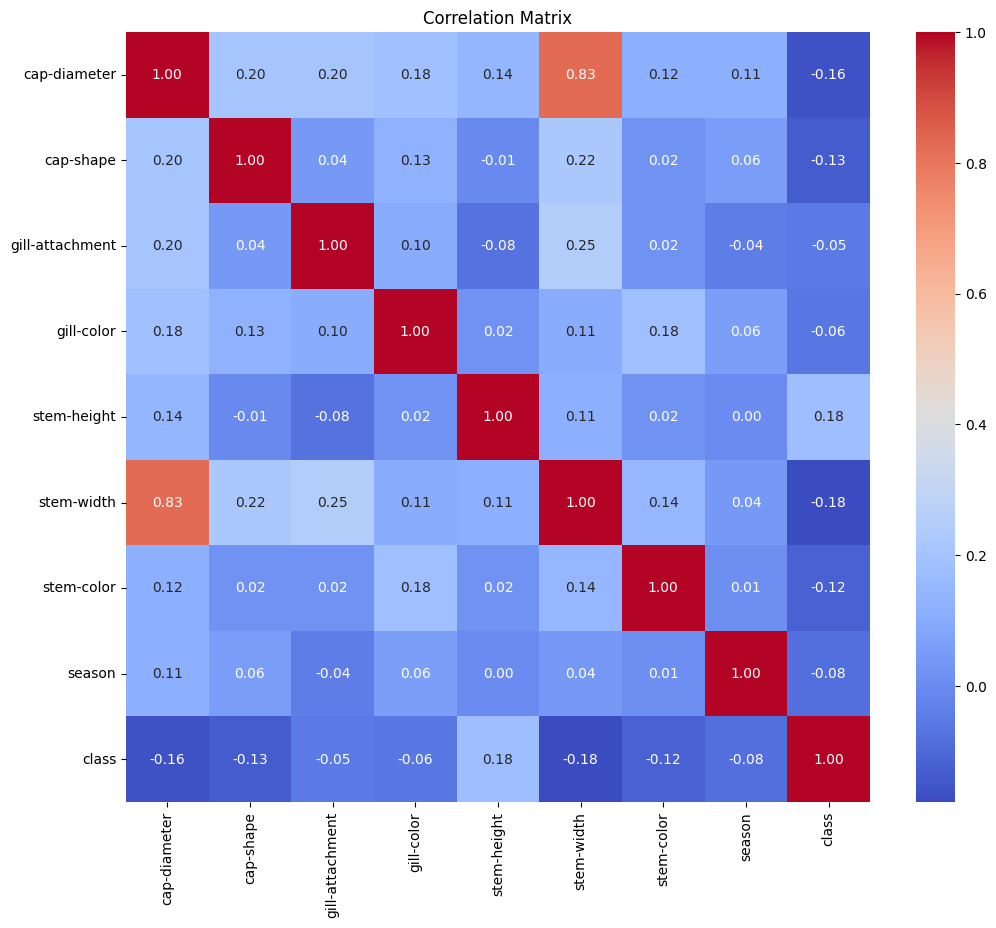

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**KNN Model Implementation**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Define hyperparameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

In [ ]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [ ]:
# Get the best KNN model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_knn.predict(X_test)

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9854843212059179
Precision: 0.9846461949265688
Recall: 0.9892689470154259
F1-score: 0.9869521579123453


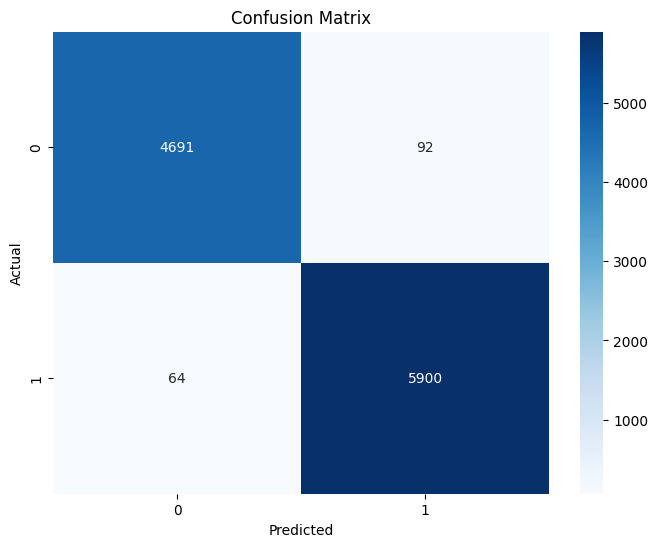

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Generating Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(f"Best Hyperparameters: {best_params}")

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4783
           1       0.98      0.99      0.99      5964

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747

Best Hyperparameters: {'n_neighbors': 3}


In [ ]:
def predict_mushroom_edibility():
    """
    Predicts the edibility of a mushroom based on user input.
    """

    # Feature input from the user
    cap_diameter = float(input("Enter cap diameter: "))
    cap_shape = float(input("Enter cap shape (0-1): "))
    gill_attachment = float(input("Enter gill attachment (0-1): "))
    gill_color = float(input("Enter gill color (0-1): "))
    stem_width = float(input("Enter stem width (0-1): "))
    stem_color = float(input("Enter stem color (0-1): "))
    stem_height = float(input("Enter stem height: "))
    season = float(input("Enter season (0-3): "))


    # Create a DataFrame for the user's input
    user_input = pd.DataFrame({
        'cap-diameter': [cap_diameter],
        'cap-shape': [cap_shape],
        'gill-attachment': [gill_attachment],
        'gill-color': [gill_color],
        'stem-width': [stem_width],
        'stem-color': [stem_color],
        'stem-height': [stem_height],
        'season': [season]
    })

    # Use the trained model to make a prediction
    prediction = best_knn.predict(user_input)

    # Display the prediction
    if prediction[0] == 0:
        print("The mushroom is predicted to be edible.")
    else:
        print("The mushroom is predicted to be poisonous. Do not consume!")


if __name__ == "__main__":
    predict_mushroom_edibility()

Enter cap diameter: 424
Enter cap shape (0-1): 0.3
Enter gill attachment (0-1): 0.5
Enter gill color (0-1): 0.7
Enter stem width (0-1): 0.6
Enter stem color (0-1): 0.8
Enter stem height: 0.6
Enter season (0-3): 0.27


NameError: name 'pd' is not defined